# Loading Data

In [390]:
import numpy as np
import pandas as pd

%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

%pip install sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import randint


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [470]:

yellow_taxi_df = pd.read_parquet('yellow_tripdata_2024-12.parquet')

# Data Exploration

In this section, we will explore the dataset and understand its characteristics and data.

In [471]:
yellow_taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0000,9.7600,1.0000,N,138,33,1,38.0000,6.0000,0.5000,4.7200,0.0000,1.0000,51.9700,0.0000,1.7500
1,2,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0000,7.6200,1.0000,N,158,42,1,37.3000,1.0000,0.5000,8.4600,0.0000,1.0000,50.7600,2.5000,0.0000
2,2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0000,20.0700,2.0000,N,132,236,2,70.0000,0.0000,0.5000,0.0000,6.9400,1.0000,82.6900,2.5000,1.7500
3,2,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0000,2.3400,1.0000,N,142,186,1,15.6000,1.0000,0.5000,4.1200,0.0000,1.0000,24.7200,2.5000,0.0000
4,2,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0000,5.0500,1.0000,N,107,80,1,26.8000,1.0000,0.5000,5.0000,0.0000,1.0000,36.8000,2.5000,0.0000


In [393]:
yellow_taxi_df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3646364,2,2024-11-30 23:11:15,2024-11-30 23:19:33,NaN,1.0900,NaN,None,162,142,0,1.0000,0.0000,0.5000,0.0000,0.0000,1.0000,5.0000,NaN,NaN
3646365,1,2024-11-30 23:49:30,2024-12-01 00:27:39,NaN,20.1000,NaN,None,132,238,0,70.0000,0.0000,0.5000,8.0900,6.9400,1.0000,89.0300,NaN,NaN
3646366,2,2024-11-30 23:31:46,2024-12-01 00:04:32,NaN,1.3800,NaN,None,100,230,0,18.7100,0.0000,0.5000,0.0000,0.0000,1.0000,22.7100,NaN,NaN
3646367,2,2024-11-30 23:41:21,2024-11-30 23:53:20,NaN,2.6300,NaN,None,42,75,0,13.2600,0.0000,0.5000,0.0000,0.0000,1.0000,14.7600,NaN,NaN
3646368,2,2024-11-30 23:21:52,2024-11-30 23:31:11,NaN,1.1600,NaN,None,116,42,0,-0.5000,0.0000,0.5000,0.0000,0.0000,1.0000,1.0000,NaN,NaN


In [394]:
yellow_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646369 entries, 0 to 3646368
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [395]:
print(yellow_taxi_df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


# Handling Data

In [398]:
# supress scientific notation by setting float_format
pd.options.display.float_format = '{:.2f}'.format

yellow_taxi_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3646369.00,3646369,3646369,3272695.00,3646369.00,3272695.00,3646369.00,3646369.00,3646369.00,3646369.00,3646369.00,3646369.00,3646369.00,3646369.00,3646369.00,3646369.00,3272695.00,3272695.00
mean,1.77,2024-11-15 17:27:55.648361,2024-11-15 17:45:42.936777,1.33,5.37,2.36,164.62,163.82,1.10,19.20,1.31,0.48,3.32,0.54,0.96,27.65,2.24,0.13
min,1.00,2002-12-31 22:17:43,2002-12-31 22:23:55,0.00,0.00,1.00,1.00,1.00,0.00,-1458.30,-7.50,-0.50,-93.68,-140.63,-1.00,-1477.68,-2.50,-1.75
25%,2.00,2024-11-08 16:43:32,2024-11-08 17:05:55,1.00,1.00,1.00,132.00,113.00,1.00,9.30,0.00,0.50,0.00,0.00,1.00,15.80,2.50,0.00
50%,2.00,2024-11-15 19:11:36,2024-11-15 19:28:02,1.00,1.72,1.00,162.00,162.00,1.00,14.20,1.00,0.50,2.65,0.00,1.00,21.00,2.50,0.00
75%,2.00,2024-11-22 16:02:55,2024-11-22 16:23:55,1.00,3.29,1.00,234.00,234.00,1.00,22.60,2.50,0.50,4.26,0.00,1.00,30.50,2.50,0.00
max,6.00,2024-12-01 22:04:33,2024-12-01 23:10:54,9.00,398608.62,99.00,265.00,265.00,4.00,335544.44,14.25,41.30,572.50,140.63,1.00,335550.94,2.50,1.75
std,0.42,NaN,NaN,0.78,538.69,11.09,64.55,69.45,0.66,176.76,1.77,0.14,4.07,2.18,0.27,177.33,0.88,0.49


There are several key points we can observe and understand from the table above:
- The data spans from the year 2002 to 2024.
- The maximum number of passenger in a yellow cab is only 5 passengers (usually 4), yet the maximum of passenger_count shown is 9.
- The maximum trip distance in this dataset is 398,609 miles, which is illogical for a taxi trip.
- The minimum fare amount is -$1458, which indicates the existence of voided/refunded transactions in this dataset. This can be observed in other variables including 'extra','mta_tax','tip_amount' and other related financial data as well.

Some of these key points will be handled Outliers section. But firstly, we will start by removing columns that are irrelevant to the project.

### Removing Columns

The following list is the columns that will be removed:
- RatecodeID: Mostly redundant unless you're distinguishing airport rides.
- Payment Type: Not related to trip duration.
- Tolls Amount: More related to fare prediction than duration.
- Mta_tax: More related to fare prediction than duration.
- Tip_amount: More related to fare prediction than duration.
- Total_amount: More related to fare prediction than duration.
- Airport_fee: Not related to trip duration.
- Store_and_fwd_flag: Not related to trip duration.

These columns does not show relevance to the target variable (Trip duration).

In [399]:
irrelevant_cols = [
    'VendorID','RatecodeID','store_and_fwd_flag',
    'payment_type','mta_tax', 'fare_amount', 'PULocationID', 'DOLocationID',
    'tip_amount','tolls_amount','improvement_surcharge','total_amount'
]

for column in irrelevant_cols:
   yellow_taxi_df.drop(column, axis=1, inplace=True)
   print(f'{column} has been dropped.')

VendorID has been dropped.
RatecodeID has been dropped.
store_and_fwd_flag has been dropped.
payment_type has been dropped.
mta_tax has been dropped.
fare_amount has been dropped.
PULocationID has been dropped.
DOLocationID has been dropped.
tip_amount has been dropped.
tolls_amount has been dropped.
improvement_surcharge has been dropped.
total_amount has been dropped.


In [400]:
yellow_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646369 entries, 0 to 3646368
Data columns (total 7 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[us]
 1   tpep_dropoff_datetime  datetime64[us]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   extra                  float64       
 5   congestion_surcharge   float64       
 6   Airport_fee            float64       
dtypes: datetime64[us](2), float64(5)
memory usage: 194.7 MB


### Handling Missing Data

Checking NaN values in all attributes

In [401]:
percent_missing = yellow_taxi_df.isnull().sum() / len(yellow_taxi_df) * 100
print(percent_missing)

tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count         10.25
trip_distance            0.00
extra                    0.00
congestion_surcharge    10.25
Airport_fee             10.25
dtype: float64


The percentage of missing values in 'passenger_count' and 'congestion_surcharge' are both 10%. This is a slightly significant amount of missing values (>5%), thus we must handle these missing data carefully.

For passenger_count (10%), we will first look at the distribution of this feature.

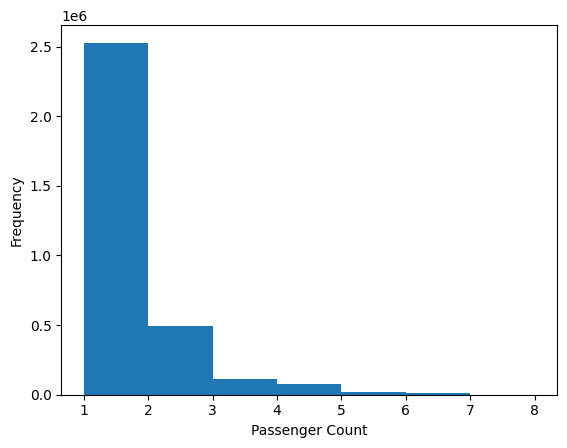

In [402]:
plt.hist(yellow_taxi_df['passenger_count'],bins=range(1,int(yellow_taxi_df['passenger_count'].max())))
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.show()

Since passenger count of 1 dominates the distribution, it will be justified to impute the **mode** of the feature on the missing data.

In [403]:
yellow_taxi_df.fillna({'passenger_count':yellow_taxi_df['passenger_count'].mode()}, inplace=True)

In [404]:
print(yellow_taxi_df['passenger_count'].isnull().sum())

373674


The missing data for passenger_count has been handled. Now, for congestion surcharge, we will repeat the same steps, but using Seaborn countplot instead.

- There are many methods in visualising distributions, but I found using Seaborn the most simplest way to perform the task.

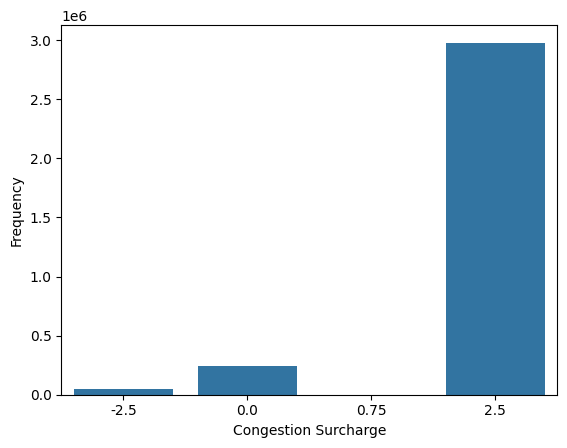

In [405]:
sns.countplot(x=yellow_taxi_df['congestion_surcharge'])
plt.xlabel("Congestion Surcharge")
plt.ylabel("Frequency")
plt.show()

The figure above shows that most trips will apply congestion surcharge of $2.50. Thus, we will use **mode** to impute the missing data as well.

- Notice how there is a negative value too, in this feature. But we will handle this in the Dealing with Outliers section!

In [406]:
yellow_taxi_df.fillna({'congestion_surcharge':yellow_taxi_df['congestion_surcharge'].mode()}, inplace=True)

print(yellow_taxi_df['passenger_count'].isnull().sum())

373674


### Checking Duplicates

It is a crucial step to check for duplicates as this will have a major consequence on the model performance, depending on the amount of duplicates in the dataset.

In [407]:
# Check for duplicate rows
duplicates = yellow_taxi_df.duplicated()

# count total number of duplicates
num_of_duplicates = duplicates.sum()
print(f'Total number of duplicate rows: {num_of_duplicates}')
print(f'Percentage of duplicate rows in dataset:{num_of_duplicates / len(yellow_taxi_df) * 100}%')

yellow_taxi_df[duplicates]

Total number of duplicate rows: 2425
Percentage of duplicate rows in dataset:0.0665045144909909%


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,extra,congestion_surcharge,Airport_fee
1384,2024-11-01 00:25:39,2024-11-01 00:25:50,1.00,0.00,0.00,0.00,0.00
10871,2024-11-01 02:18:56,2024-11-01 02:19:17,1.00,0.00,0.00,0.00,0.00
11011,2024-11-01 02:10:06,2024-11-01 02:10:34,2.00,0.14,0.00,0.00,0.00
11384,2024-11-01 03:25:19,2024-11-01 03:38:38,1.00,9.66,0.00,0.00,0.00
12653,2024-11-01 03:47:15,2024-11-01 03:47:26,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
3250712,2024-11-30 19:02:57,2024-11-30 19:32:46,1.00,14.71,0.00,0.00,0.00
3263041,2024-11-30 22:57:33,2024-11-30 22:57:39,1.00,0.00,0.00,0.00,0.00
3264188,2024-11-30 22:11:41,2024-11-30 22:33:17,2.00,2.49,0.00,0.00,0.00
3436641,2024-11-15 17:12:28,2024-11-15 17:32:49,NaN,0.00,0.00,NaN,NaN


From above, there are 4,833 rows of which are duplicates. This is about 0.133% of the whole dataset. As it is not a significant amount, these duplicates must be eliminated to properly clean the data.

In [408]:
yellow_taxi_df.drop_duplicates(inplace=True)

In [409]:
# Check again for duplicate rows
duplicates = yellow_taxi_df.duplicated()
num_of_duplicates = duplicates.sum()
print(f'Total number of duplicate rows now: {num_of_duplicates}')

Total number of duplicate rows now: 0


### Outliers

#### Trip Distance

<Axes: ylabel='trip_distance'>

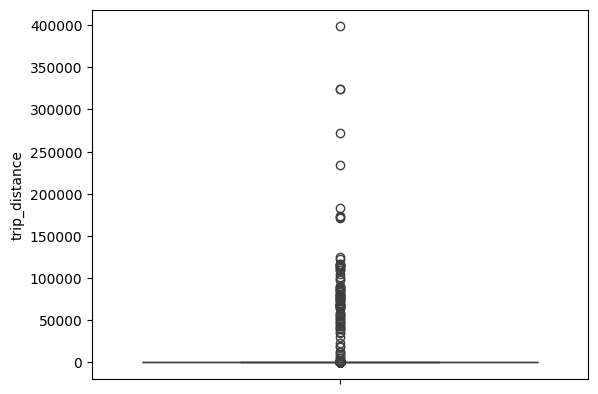

In [410]:
sns.boxplot(yellow_taxi_df, y='trip_distance')

Since distance can have rare long trips, thus making it skewed, we will use the IQR method to cap the outliers.

(UPDATE: It has been identified that **capping the outliers was not a good approach** as it introduces high frequency of datapoints near the outlier bound which may decrease accuracy of the model. Thus outliers will be removed instead.)

In [411]:
# Calculate IQR
Q1 = yellow_taxi_df['trip_distance'].quantile(0.25)  # 25th percentile
Q3 = yellow_taxi_df['trip_distance'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers crossing the bounds
yellow_taxi_df = yellow_taxi_df.loc[
    (yellow_taxi_df['trip_distance'] <= upper_bound) &
    (yellow_taxi_df['trip_distance'] >= lower_bound)
]

<Axes: ylabel='trip_distance'>

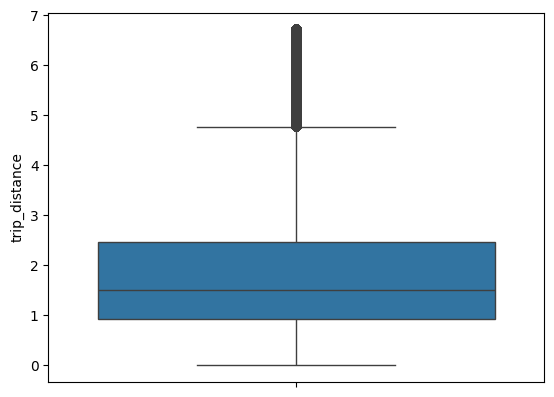

In [412]:
sns.boxplot(yellow_taxi_df, y='trip_distance')

Removing Datapoints where Trip Distance is 0 (Invalid Trip)

In [413]:
# Remove datapoints with distance of 0
yellow_taxi_df = yellow_taxi_df.loc[yellow_taxi_df['trip_distance']>0]

#### Passenger Count

<Axes: ylabel='passenger_count'>

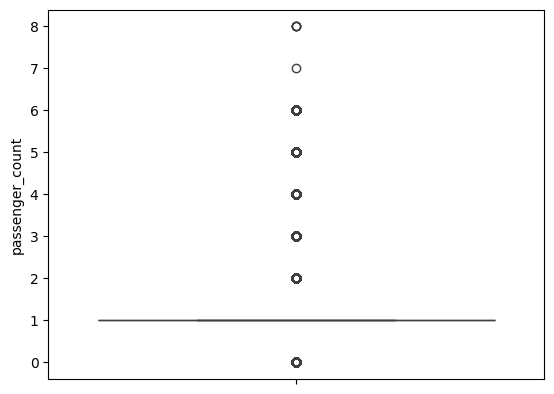

In [414]:
sns.boxplot(yellow_taxi_df, y='passenger_count')

Since Yellow taxis only allow up to 6 passengers, values above 6 are likely entry error, as well as trips with 0 passenger.

<Axes: ylabel='passenger_count'>

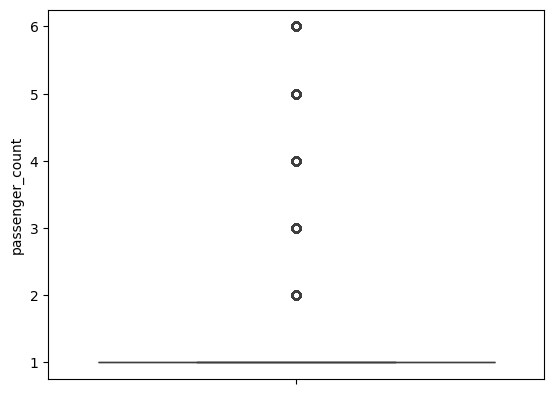

In [415]:
yellow_taxi_df = yellow_taxi_df[(yellow_taxi_df['passenger_count'] >= 1) & (yellow_taxi_df['passenger_count'] <= 6)]

sns.boxplot(yellow_taxi_df, y='passenger_count')

#### Extra

<Axes: ylabel='extra'>

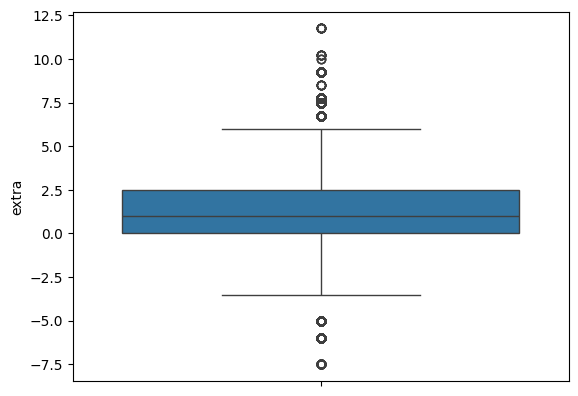

In [416]:
sns.boxplot(yellow_taxi_df, y='extra')

Negative values in 'extra' indicates reverse transactions, or refunds, thus we will not require this data. To handle this, first we look at the percentage of rows with such values.

In [417]:
print(f"Percentage of Rows with Negative Values in 'extra': {len(yellow_taxi_df.loc[yellow_taxi_df['extra'] < 0]) / len(yellow_taxi_df) * 100}")

Percentage of Rows with Negative Values in 'extra': 0.7989333689068286


<Axes: ylabel='extra'>

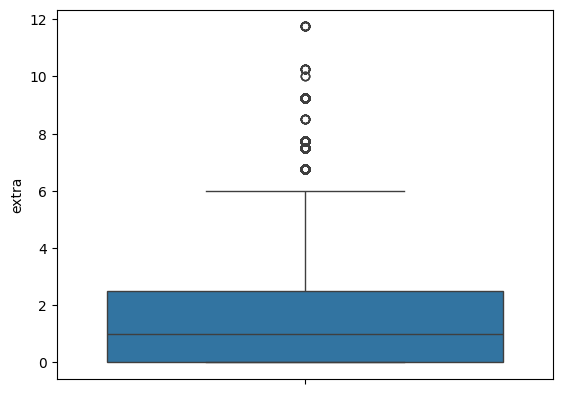

In [418]:
yellow_taxi_df = yellow_taxi_df.loc[yellow_taxi_df['extra'] >= 0]
sns.boxplot(yellow_taxi_df, y='extra')

#### Congestion Surcharge

<Axes: ylabel='congestion_surcharge'>

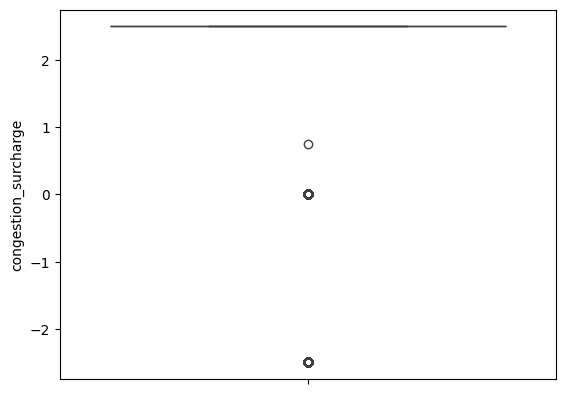

In [419]:
sns.boxplot(yellow_taxi_df, y='congestion_surcharge')

In [420]:
print(f"Percentage of Rows with Negative Values in 'extra': {len(yellow_taxi_df.loc[yellow_taxi_df['congestion_surcharge'] < 0]) / len(yellow_taxi_df) * 100}")

Percentage of Rows with Negative Values in 'extra': 0.7931492954162109


Here, we will only keep rows with whole numbers for 'congestion_surcharge'.

In [421]:
yellow_taxi_df = yellow_taxi_df.loc[yellow_taxi_df['congestion_surcharge'] >= 0]

/Users/ikmalbasirun/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


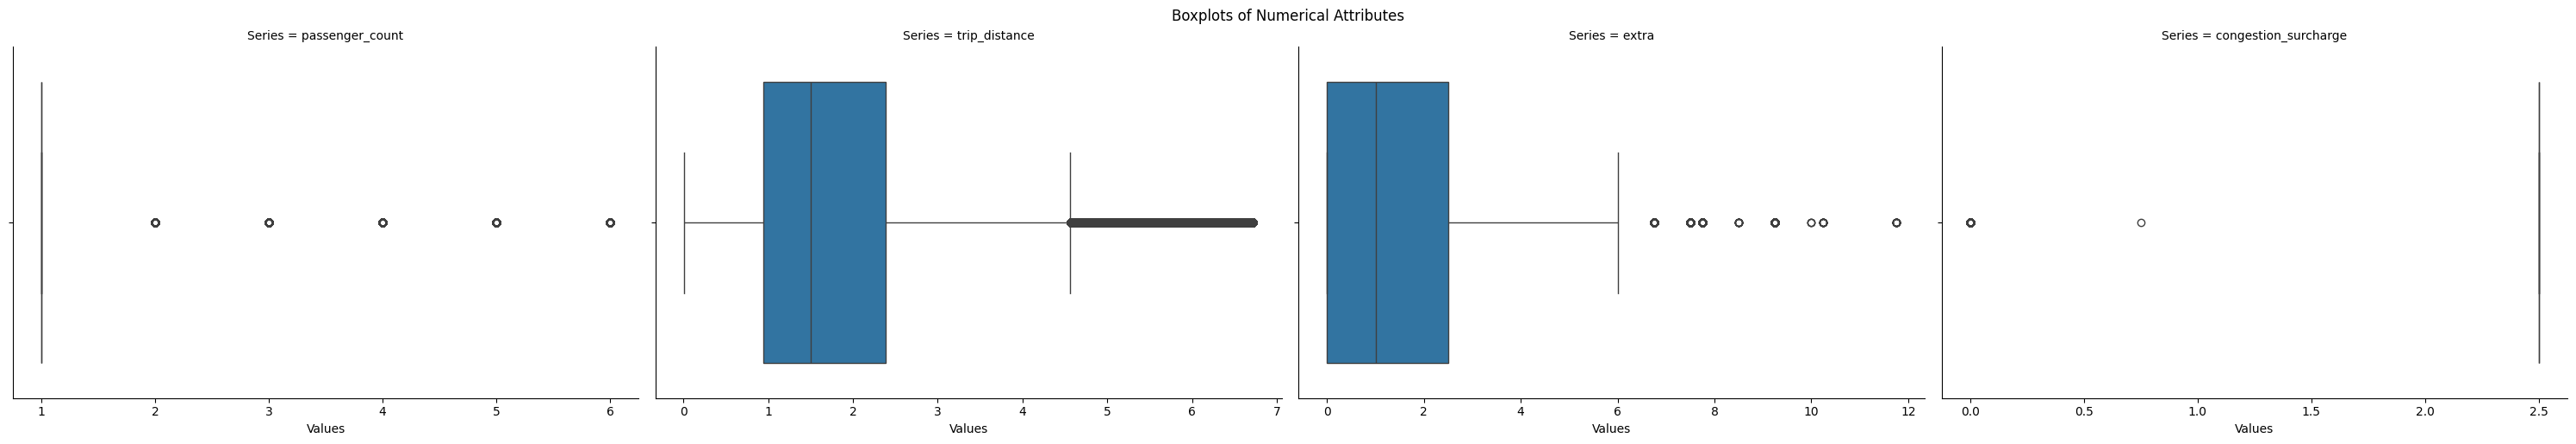

In [422]:
numerical_df = pd.DataFrame(yellow_taxi_df[['passenger_count','trip_distance','extra','congestion_surcharge']])

numerical_melted_df = numerical_df.melt(var_name='Series',value_name='Values')

graph = sns.FacetGrid(numerical_melted_df, col='Series', sharex=False, sharey=False, height=5, aspect=1.5, col_wrap=4)
graph.map(sns.boxplot, 'Values')
graph.fig.suptitle('Boxplots of Numerical Attributes', y=1.02)

plt.show()

# Data Transformation

### Creating 'Trip Duration' Feature

In [423]:
yellow_taxi_df['trip_duration_in_mins'] = (yellow_taxi_df['tpep_dropoff_datetime'] - yellow_taxi_df['tpep_pickup_datetime']).dt.total_seconds() / 60

yellow_taxi_df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,extra,congestion_surcharge,Airport_fee,trip_duration_in_mins
1,2024-11-01 00:46:24,2024-11-01 00:57:17,1.00,1.93,1.00,2.50,0.00,10.88
3,2024-11-01 00:12:55,2024-11-01 00:22:17,2.00,0.93,1.00,2.50,0.00,9.37
4,2024-11-01 00:54:45,2024-11-01 00:59:47,1.00,0.38,1.00,2.50,0.00,5.03
5,2024-11-01 00:19:00,2024-11-01 00:21:28,1.00,0.48,1.00,2.50,0.00,2.47
6,2024-11-01 00:42:45,2024-11-01 00:56:23,2.00,2.61,1.00,0.00,0.00,13.63
7,2024-11-01 00:30:10,2024-11-01 00:37:28,1.00,2.52,1.00,2.50,0.00,7.30
8,2024-11-01 00:44:14,2024-11-01 00:49:12,1.00,1.12,1.00,0.00,0.00,4.97
9,2024-11-01 00:05:05,2024-11-01 00:13:12,2.00,0.74,1.00,2.50,0.00,8.12
10,2024-11-01 00:46:00,2024-11-01 01:13:00,1.00,3.60,3.50,2.50,0.00,27.00
11,2024-11-01 00:08:29,2024-11-01 00:10:10,2.00,0.40,1.00,0.00,0.00,1.68


In [424]:
yellow_taxi_df.loc[yellow_taxi_df['trip_duration_in_mins'] < 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,extra,congestion_surcharge,Airport_fee,trip_duration_in_mins
147467,2024-11-02 09:15:00,2024-11-02 09:08:42,1.00,1.00,0.00,0.00,0.00,-6.30
199646,2024-11-02 17:30:00,2024-11-02 17:29:12,1.00,0.60,0.00,0.00,0.00,-0.80
251110,2024-11-03 01:56:38,2024-11-03 01:09:30,1.00,1.81,1.00,2.50,0.00,-47.13
251118,2024-11-03 01:49:55,2024-11-03 01:05:10,1.00,2.57,1.00,2.50,0.00,-44.75
251122,2024-11-03 01:53:26,2024-11-03 01:03:49,1.00,2.08,1.00,2.50,0.00,-49.62
...,...,...,...,...,...,...,...,...
2677661,2024-11-24 13:50:00,2024-11-24 13:48:23,1.00,1.10,0.00,0.00,0.00,-1.62
2780785,2024-11-25 15:30:00,2024-11-25 15:00:10,1.00,0.30,0.00,0.00,0.00,-29.83
2863428,2024-11-26 12:00:00,2024-11-26 11:33:10,1.00,4.70,0.00,0.00,0.00,-26.83
2871302,2024-11-26 14:30:00,2024-11-26 14:21:03,1.00,2.20,0.00,0.00,0.00,-8.95


The statistics above show the existence of negative values in 'trip_duration_in_mins', which is impossible in nature. Thus, we need to decide the next step for these rows.

In [425]:
print(f"Percentage of Rows with Negative Values in 'trip_duration_in_mins': {len(yellow_taxi_df.loc[yellow_taxi_df['trip_duration_in_mins'] < 0]) / len(yellow_taxi_df) * 100}")

Percentage of Rows with Negative Values in 'trip_duration_in_mins': 0.027802343194602192


Since the percentage of rows with negative values in 'trip_duration_in_mins' is very small and insignificant, it is acceptable to remove them.

In [426]:
yellow_taxi_df = yellow_taxi_df.loc[yellow_taxi_df['trip_duration_in_mins'] >= 0]

print(f"Percentage of Rows with Negative Values in 'trip_duration_in_mins': {len(yellow_taxi_df.loc[yellow_taxi_df['trip_duration_in_mins'] < 0]) / len(yellow_taxi_df) * 100}")

Percentage of Rows with Negative Values in 'trip_duration_in_mins': 0.0


In [427]:
yellow_taxi_df['trip_duration_in_mins'].describe()

count   2743610.00
mean         14.24
std          32.02
min           0.00
25%           7.37
50%          11.70
75%          17.77
max        2761.22
Name: trip_duration_in_mins, dtype: float64

Next, let's have a look at the feature's distribution using boxplot.

<Axes: xlabel='trip_duration_in_mins'>

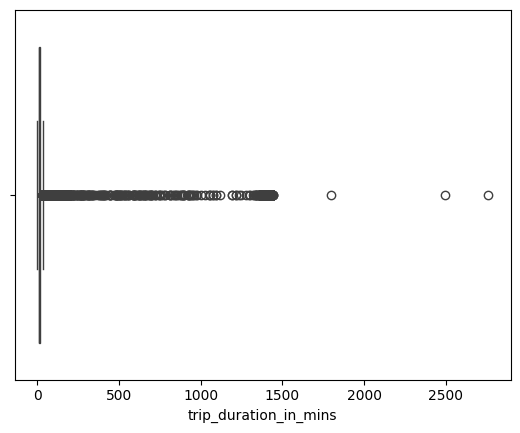

In [428]:
sns.boxplot(x=yellow_taxi_df['trip_duration_in_mins'])

The long tails in the boxplot figure above indicates extreme skewness, thus, the outliers will be capped using the IQR method instead of using Z-score.

(UPDATE: Similarly to 'trip_distance', capping the outliers was not an effective approach, thus outliers will be removed.)

#### Removing Outliers in 'trip_duration_in_mins'

In [429]:
# Calculate IQR
Q1 = yellow_taxi_df['trip_duration_in_mins'].quantile(0.25)  # 25th percentile
Q3 = yellow_taxi_df['trip_duration_in_mins'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers crossing the bounds
yellow_taxi_df = yellow_taxi_df.loc[
    (yellow_taxi_df['trip_duration_in_mins'] <= upper_bound) &
    (yellow_taxi_df['trip_duration_in_mins'] >= lower_bound)
]

<Axes: xlabel='trip_duration_in_mins'>

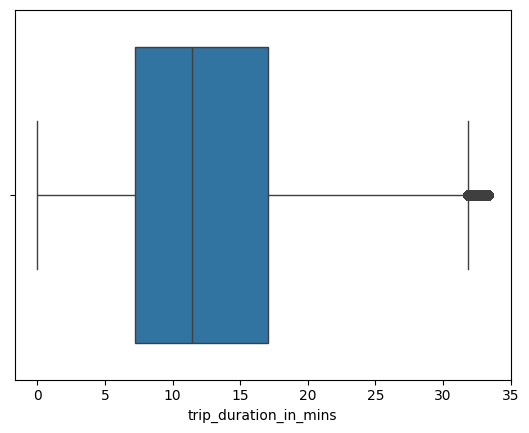

In [430]:
sns.boxplot(x=yellow_taxi_df['trip_duration_in_mins'])

Now that the outliers for our new feature 'trip_duration_in_mins' are handled, let's take a look at the histogram of the feature.

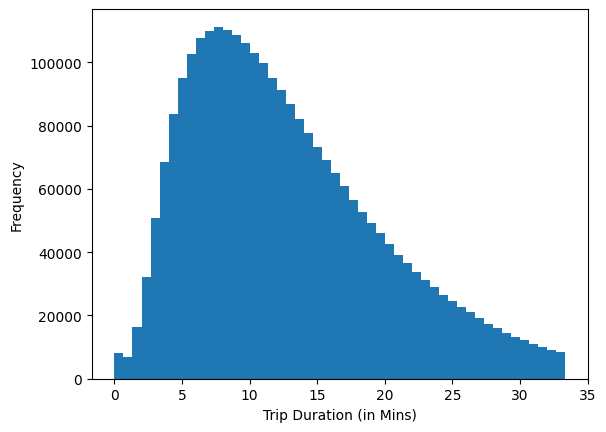

In [431]:
plt.hist(yellow_taxi_df['trip_duration_in_mins'],bins=50)
plt.xlabel("Trip Duration (in Mins)")
plt.ylabel("Frequency")
plt.show()

The histogram above shows a skewedness towards the left. This shows that there are more data collected for trips with durations around 5-15 minutes. Moreover, this shows an **imbalace** in the dataset, which is important to acknowledge.

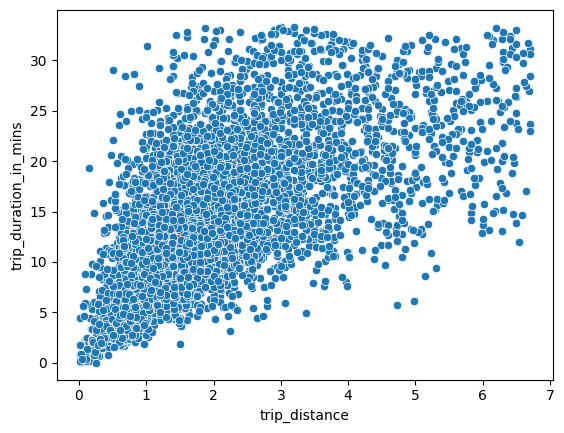

In [432]:
# Take a random sample of rows (adjust as needed)
sample_df = yellow_taxi_df.sample(n=7000, random_state=42) 

sns.scatterplot(x=sample_df['trip_distance'], y=sample_df['trip_duration_in_mins'])
plt.show()

Now that the extreme outliers have been removed, the pairplot provides a clearer insight into the data. 

##### Analysis
- The scatterplot reveals a **linear relationship** between trip distance and duration within the **0 to 2-mile range**. However, for trips exceeding 2 miles, the duration becomes more **variable**. This variation is expected, as longer routes are more susceptible to **traffic congestion**, which can be influenced by factors such as **road-related incidents, overall traffic flow, and nearby events**. These insights highlight the complexity of travel time predictions in urban environments.

##### Further Identification of Outliers
The scatterplot reveals several additional outliers that may be invalid or illogical. For instance, it is unrealistic for a trip with a distance of 3 miles to be completed in less than 2 minutes. These data points likely warrant further scrutiny and possible removal or correction.

In [433]:
# Manually removing additional invalid outliers
yellow_taxi_df = yellow_taxi_df.loc[~((yellow_taxi_df['trip_distance'] > 2) & (yellow_taxi_df['trip_duration_in_mins'] < 3))]

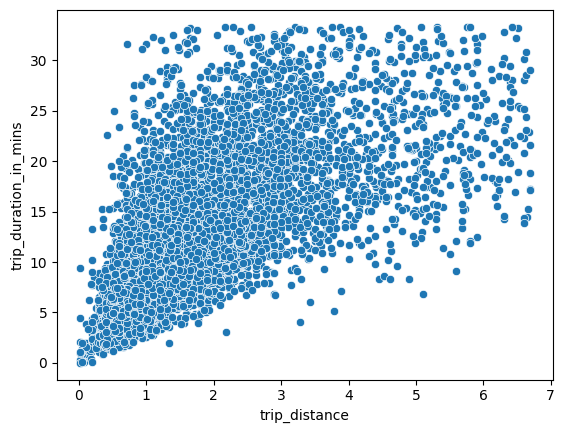

In [434]:
# Take a random sample of rows (adjust as needed)
sample_df = yellow_taxi_df.sample(n=7000, random_state=42) 

sns.scatterplot(x=sample_df['trip_distance'], y=sample_df['trip_duration_in_mins'])
plt.show()

### Building the Peak Times & Busy Days Features

#### Peak Times (Group By Hour)

To analyse the peak times and days, we will analyse the Pick-up Time from the 'tpep_pickup_datetime' variable, as it the number of trips started during peak times and on busy days. Otherwise, choosing Drop-off Time ('tpep_dropoff_datetime') would be inaccurate as trips may end at different times from the actual peak hours of the day.

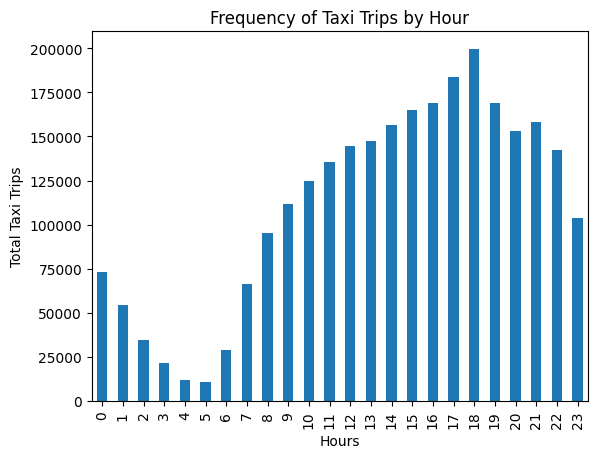

In [435]:
#Create a new column called 'hour' to extract the hour from each trip in the dataset
yellow_taxi_df['hour'] = yellow_taxi_df['tpep_pickup_datetime'].dt.hour

#Create a separate DataFrame to count the number of occurences per hour
peak_times_df = yellow_taxi_df.groupby('hour').size()

#Create a bar graph using the peak_times_df
peak_times_df.plot(kind='bar',x='hour',y='Value')

plt.xlabel('Hours')
plt.ylabel('Total Taxi Trips')
plt.title('Frequency of Taxi Trips by Hour')

plt.show()


From the graph above, we can observe that:

- NYC taxi services experience a noticeable increase in activity starting at 5 am, with the most significant rise in the number of trips occurring between 6 am and 7 am. This aligns with the typical rush hour, as people begin commuting to work or school. 

- The peak period of the day occurs at 6 pm, which corresponds with the evening rush, when people are likely leaving work and heading home or to other activities. 

- Following this, there is a sharp decline in taxi trips from 6 pm to 7 pm, which indicates that the demand for taxis decreases significantly after the peak commuting hours. This suggests that the bulk of taxi usage is tied to regular work hours and commuting patterns, with a clear drop-off in demand once people are settled at home or finished with their workday.

#### Busy Days of the Week (Group by Weekdays)

For the purpose of visualising the data for busy days, we will use the **.dt.day_name()** function. 

Though we can use **.dt.weekday** (returns from 0 - Monday to 6 - Saturday) for 'datetime' data types, the ML model will recognise this as continuous variable, instead of categorical. Thus, we will use one-hot-encoding for the newly created feature 'weekday' instead.

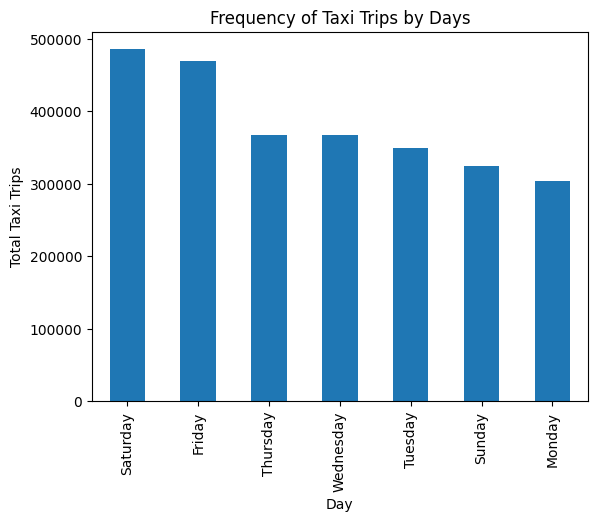

In [436]:
yellow_taxi_df['weekday'] = yellow_taxi_df['tpep_pickup_datetime'].dt.day_name()  # Extract weekday first

#Create a separate DataFrame to visualise the occurences of trips by weekday
busy_days_df = yellow_taxi_df.groupby('weekday').size()  # Count occurrences per day

#Sort by descending
busy_days_sorted_df = busy_days_df.sort_values(ascending=False)

#Create a bar graph
busy_days_sorted_df.plot(kind='bar',x='day',y='Value')

plt.xlabel('Day')
plt.ylabel('Total Taxi Trips')
plt.title('Frequency of Taxi Trips by Days')

plt.show()

In [437]:
print(f"Percentage of NA values:{yellow_taxi_df['weekday'].isnull().sum() / len(yellow_taxi_df) * 100}")

Percentage of NA values:0.0


Now that several features have been extracted from the 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' variables, we will drop them for the purpose of the regression model.

In [438]:
yellow_taxi_df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1,inplace=True)

## Congestion Feature

In [439]:
yellow_taxi_df['congestion_index'] = yellow_taxi_df['extra'].apply(lambda x: 1 if x == 1 else 0) + yellow_taxi_df['congestion_surcharge']

yellow_taxi_df.drop(columns=['congestion_surcharge','extra'],axis=1,inplace=True)

yellow_taxi_df['congestion_index'].describe()

count   2662914.00
mean          2.64
std           0.62
min           0.00
25%           2.50
50%           2.50
75%           2.50
max           3.50
Name: congestion_index, dtype: float64

In [440]:
yellow_taxi_df.sample(10)

,passenger_count,trip_distance,Airport_fee,trip_duration_in_mins,hour,weekday,congestion_index
1119441,1.00,2.18,0.00,14.53,8,Monday,2.50
1899130,2.00,1.06,0.00,7.62,19,Sunday,2.50
419065,1.00,2.17,0.00,20.58,18,Monday,2.50
95242,1.00,1.30,0.00,5.05,20,Friday,2.50
2007474,1.00,4.00,0.00,16.85,22,Monday,2.50
1634265,1.00,4.67,0.00,32.02,16,Friday,2.50
45886,5.00,0.68,0.00,11.90,13,Friday,2.50
3003336,1.00,3.12,0.00,18.53,18,Wednesday,2.50
1724115,1.00,2.22,0.00,12.62,11,Saturday,2.50
3048832,2.00,4.95,0.00,18.38,11,Thursday,2.50


## One-hot Encoding

In [441]:
# Create dummy variables for the 'weekday' column
encoded_df = pd.get_dummies(yellow_taxi_df['weekday'], prefix='weekday')

# Join the encoded columns with the original DataFrame
yellow_taxi_df = yellow_taxi_df.join(encoded_df)

# Display the final DataFrame
yellow_taxi_df.sample(10)

,passenger_count,trip_distance,Airport_fee,trip_duration_in_mins,hour,weekday,congestion_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
383425,1.00,4.52,1.75,17.62,12,Monday,0.00,False,True,False,False,False,False,False
356831,1.00,3.20,0.00,18.75,7,Monday,2.50,False,True,False,False,False,False,False
1636307,1.00,0.80,0.00,3.85,16,Friday,2.50,True,False,False,False,False,False,False
3147387,5.00,1.61,0.00,9.30,16,Friday,2.50,True,False,False,False,False,False,False
490685,1.00,0.80,0.00,3.63,15,Tuesday,2.50,False,False,False,False,False,True,False
734262,2.00,0.55,0.00,3.92,19,Thursday,2.50,False,False,False,False,True,False,False
6966,1.00,1.16,0.00,7.93,1,Friday,3.50,True,False,False,False,False,False,False
298910,1.00,2.90,0.00,30.05,14,Sunday,2.50,False,False,False,True,False,False,False
260141,1.00,2.41,0.00,12.97,2,Sunday,3.50,False,False,False,True,False,False,False
1003968,1.00,1.81,0.00,10.08,22,Saturday,3.50,False,False,True,False,False,False,False


In [442]:
yellow_taxi_df.drop(columns='weekday',inplace=True)

## Sine Encoding

Since the 'hour' feature is cyclical in nature, sine encoding should be applied. Without this step, the cyclical relationship between hours will not be captured, as these numbers (hours) do not inherently represent the cyclic nature of the day.

In [443]:
yellow_taxi_df['hour_sin'] = np.sin(2 * np.pi * yellow_taxi_df['hour'] / 24)

yellow_taxi_df.drop(['hour'],axis=1,inplace=True)

In [444]:
pd.options.display.float_format = '{:.4f}'.format

yellow_taxi_df.sample(10)

,passenger_count,trip_distance,Airport_fee,trip_duration_in_mins,congestion_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,hour_sin
1019395,1.0000,6.0500,0.0000,28.0667,3.5000,False,False,False,True,False,False,False,0.2588
1772229,1.0000,1.1200,0.0000,6.2667,2.5000,False,False,True,False,False,False,False,-1.0000
574391,1.0000,1.9000,0.0000,17.2833,2.5000,False,False,False,False,False,False,True,-0.2588
3135921,1.0000,1.0900,0.0000,7.4833,0.0000,True,False,False,False,False,False,False,-0.7071
119623,1.0000,1.2500,0.0000,10.9167,3.5000,True,False,False,False,False,False,False,-0.2588
373288,1.0000,0.9800,0.0000,11.4333,2.5000,False,True,False,False,False,False,False,0.5000
2103442,1.0000,0.9500,0.0000,6.7667,3.5000,False,False,False,False,False,True,False,-0.8660
2794544,1.0000,2.4300,0.0000,18.5000,2.5000,False,True,False,False,False,False,False,-0.9659
3220708,2.0000,1.2000,0.0000,13.2667,2.5000,False,False,True,False,False,False,False,-0.7071
931107,2.0000,1.9000,0.0000,10.3833,2.5000,False,False,True,False,False,False,False,0.0000


# Adding Weather & Traffic Flow Feature

## Google Maps API

To get routes and estimate trip duration

## OpenWeather API

In [445]:
%pip install requests
%pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Correlation Matrix

<Axes: >

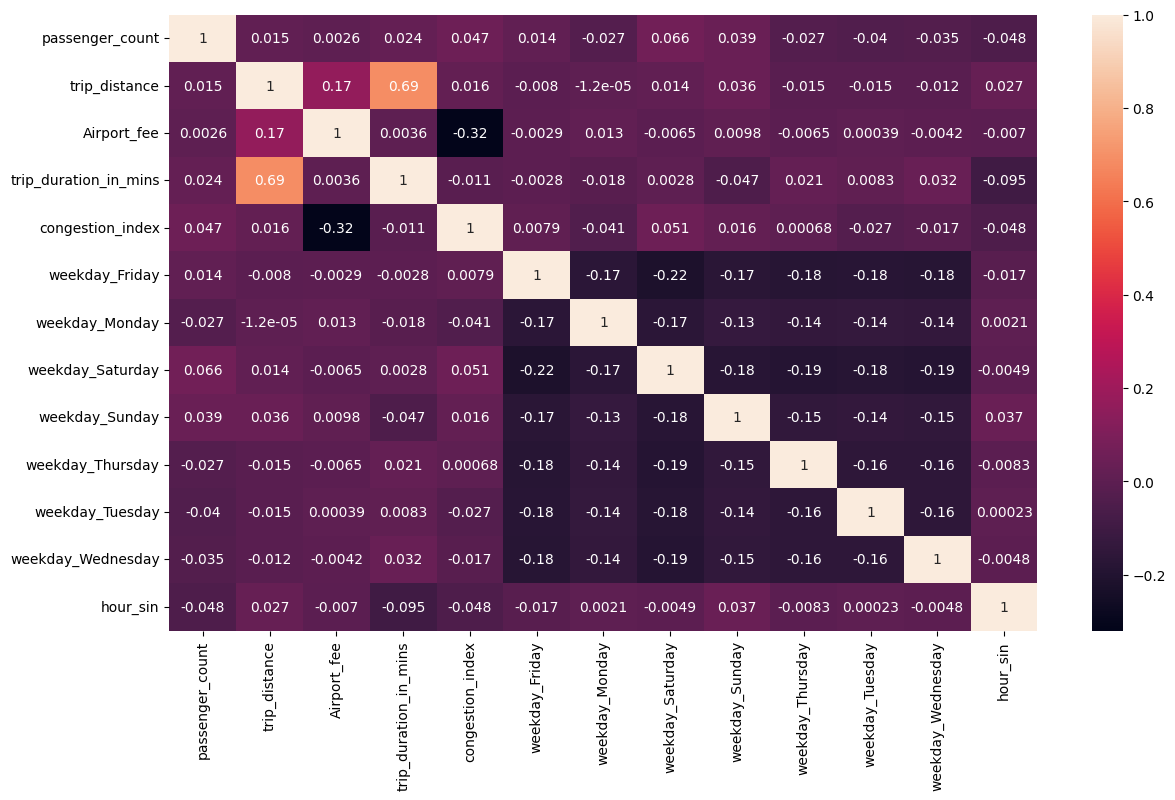

In [446]:
correlation = yellow_taxi_df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation, xticklabels=yellow_taxi_df.columns, yticklabels=yellow_taxi_df.columns, annot=True)

In [447]:
yellow_taxi_df.drop(columns=['passenger_count'], inplace=True)

# Building the Prediction Model & Performance Test

## Train-Test-Split

In [448]:
# define the training set ([x_train,y_train] pairs) where indepedent and dependent variables listed above:

x = yellow_taxi_df.drop(columns='trip_duration_in_mins',axis=1) #all columns except trip_duration_in)mins
y = yellow_taxi_df['trip_duration_in_mins']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

# reshape(-1,1) y_train (this is not necessary for x_train, since it's multi-Dimensional now):
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

# define the test set ([x_test,y_test] pairs) where indepedent and dependent variables listed above:
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

## Simple Linear Regression

In [449]:
# define a LinearRegression model and train (i.e. fit) the model using training set:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# We will now assess the model performance with the test set.
# first, predict the price for test set using the model trained above:
Y_pred = linear_model.predict(X_test)

# Find the RMSE for the test set:
RMSE_multireg = metrics.root_mean_squared_error(Y_test, Y_pred)
print("RMSE_multireg: ", RMSE_multireg)

# Calculate R^2 score for the test set
R2 = metrics.r2_score(Y_test, Y_pred)

# Calculate Adjusted R^2
n = len(Y_test)  # number of observations
p = X_test.shape[1]  # number of features (predictors)
AdjR2_multi_reg = 1 - (1 - R2) * (n - 1) / (n - p - 1)
print("AdjR2_multi_reg: ", AdjR2_multi_reg)

RMSE_multireg:  4.9414360895349585
AdjR2_multi_reg:  0.505332385769771


## Random Forest Regression

### Hyperparameter Tuning

Since the dataset is slightly large (3M rows), it might be better to sample the training set, instead of using all of the data for hyperparameter optimisation.

In [450]:
# sampling 10% of dataset for hyperparameter tuning
X_train_sample, _ , Y_train_sample, _ = train_test_split(X_train, Y_train, test_size=0.9, random_state=42)

# Hyperparameters to test
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': randint(3, 20)  # Random sampling between 3 and 20
}

# Initialise the model
reg_model = RandomForestRegressor(random_state=42)

# Perform GridSearch with CV k-Fold for Regression
grid_search = RandomizedSearchCV(
    estimator=reg_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

# Fit the model to the training data
grid_search.fit(X_train_sample, Y_train_sample)

# Obtain the best parameter and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best CV Score:", best_score)

Best Parameters: {'max_depth': 11, 'n_estimators': 50}
Best CV Score: 0.6164364991405543


### Training and Testing

In [459]:
# Initialise Random Forest Classifier
reg_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],random_state=42, n_jobs=-1)

# Train the model
reg_model.fit(X_train, Y_train)

# Make predictions on the test data
reg_Y_pred = reg_model.predict(X_test)

### Performance Metrics

In [460]:
# R^2 Score
print(f'RSME: {metrics.mean_squared_error(Y_test, reg_Y_pred):.4f}')

# Calculate R^2 score for the test set
R2 = metrics.r2_score(Y_test, reg_Y_pred)

# Calculate Adjusted R^2
n = len(Y_test)  # number of observations
p = X_test.shape[1]  # number of features (predictors)
AdjR2_multi_reg = 1 - (1 - R2) * (n - 1) / (n - p - 1)
print("AdjR2_multi_reg: ", AdjR2_multi_reg)

RSME: 19.2195
AdjR2_multi_reg:  0.6106424537949158


There's a **15.5%** increase in the model performance of Random Forest Regression with Hyperparameter Optimisation, as compared to the Simple Regression model done previously.

## XGBoost

Installing XGBoost

In [453]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Importing XGBoost

In [454]:
import xgboost as xgb

### Hyperparameter Tuning

In [466]:
param_grid = {
    'n_estimators':[50,100,200,300],
    'max_depth':[3,5,7,9,11],
    'learning_rate': [0.01,0.1,0.2],
}

xgb_model = xgb.XGBRegressor()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_sample, Y_train_sample)

best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_

print("Best Parameters:", best_params_xgb)
print(f"Best R^2 from CV: {best_score_xgb:.4f}")

/Users/ikmalbasirun/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best R^2 from CV: 0.6239


### Training & Testing

In [467]:
xgb_model = xgb.XGBRegressor(n_estimators=best_params_xgb['n_estimators'],learning_rate=best_params_xgb['learning_rate'],max_depth=best_params_xgb['max_depth'],random_state=42)

xgb_model.fit(X_train, Y_train)

xgb_y_pred = xgb_model.predict(X_test)

### Performance Metrics

In [468]:
print(f"Mean Squared Error: {metrics.mean_squared_error(Y_test, xgb_y_pred):.4f}")

# Calculate R^2 score for the test set
R2 = metrics.r2_score(Y_test, xgb_y_pred)

# Calculate Adjusted R^2
n = len(Y_test)  # number of observations
p = X_test.shape[1]  # number of features (predictors)
AdjR2_multi_reg = 1 - (1 - R2) * (n - 1) / (n - p - 1)
print(f"AdjR2_multi_reg: {AdjR2_multi_reg:.4f}")

Mean Squared Error: 18.8222
AdjR2_multi_reg: 0.6187


The model performance increased by **0.6%** using XGBoost, when compared to Random Forest.

Overall, it increased by 16.1% with XGBoost compared to the baseline model.

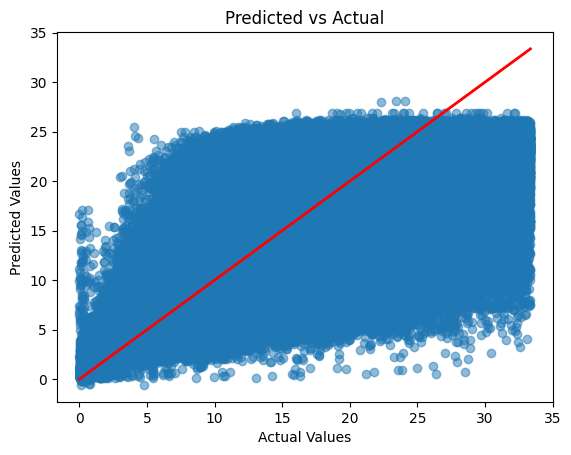

In [469]:
plt.scatter(Y_test, xgb_y_pred, alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r', lw=2)  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()